In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir("D:/Data science/recommendation system")

In [3]:
#reading the ratings file
df=pd.read_csv("ratings.csv")

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
#reading movie title file
movie=pd.read_csv("moviesnew.csv")
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
#merging the rating file & movie title file on movieid
df=pd.merge(df,movie,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title
0,1,2,3.5,1112486027,Jumanji (1995)
1,5,2,3.0,851527569,Jumanji (1995)
2,13,2,3.0,849082742,Jumanji (1995)
3,29,2,3.0,835562174,Jumanji (1995)
4,34,2,3.0,846509384,Jumanji (1995)


In [7]:
df.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
userId       1048575 non-null int64
movieId      1048575 non-null int64
rating       1048575 non-null float64
timestamp    1048575 non-null int64
title        1048575 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 48.0+ MB


In [9]:
#creating a dataframe named rating which contain the title of movie and overall rating of movie
ratings=pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
ratings.head(20)

,rating
title,
Still Bill (2009),5.0
Nameless Gangster (Bumchoiwaui junjaeng) (2012),5.0
Szamanka (1996),5.0
Keith (2008),5.0
Kiler (1997),5.0
"Killing of Sister George, The (1968)",5.0
My Girlfriend's Boyfriend (2010),5.0
Ruby & Quentin (Tais-toi!) (2003),5.0
Kiss Them for Me (1957),5.0


In [10]:
# adding the column 'number of rating' to rating dataframe
ratings['number_of_ratings']=df.groupby('title')['rating'].count()
ratings.head(20)

,rating,number_of_ratings
title,,
Still Bill (2009),5.0,1
Nameless Gangster (Bumchoiwaui junjaeng) (2012),5.0,1
Szamanka (1996),5.0,1
Keith (2008),5.0,1
Kiler (1997),5.0,1
"Killing of Sister George, The (1968)",5.0,1
My Girlfriend's Boyfriend (2010),5.0,1
Ruby & Quentin (Tais-toi!) (2003),5.0,1
Kiss Them for Me (1957),5.0,1


In [11]:
ratings.describe()

,rating,number_of_ratings
count,14021.000000,14021.000000
mean,3.214837,74.786035
std,0.790682,218.225476
min,0.500000,1.000000
25%,2.833333,2.000000
50%,3.363636,9.000000
75%,3.750000,43.000000
max,5.000000,3498.000000


In [12]:
#plotting the ratings using histogram
import matplotlib.pyplot as plt
ratings['rating'].hist(edgecolor='black',linewidth=1,bins=50)

In [13]:
#most of the rating falls between 2.5 and 4

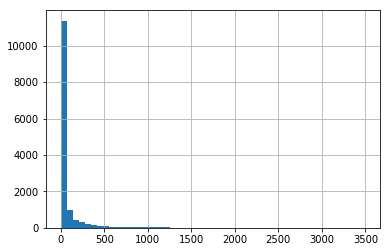

In [14]:
#plotting number of ratings
ratings['number_of_ratings'].hist(bins=50)

In [15]:
#only a very few movies have a high number of rating

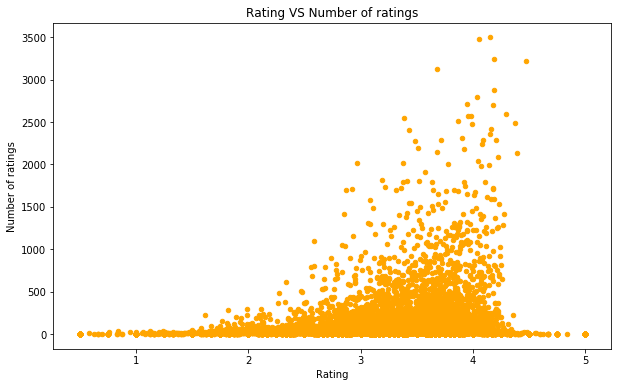

In [16]:
#a scatter plot between rating and number of ratings 
fig = ratings.plot(kind='scatter',x='rating',y='number_of_ratings',color='orange')
fig.set_xlabel("Rating")
fig.set_ylabel("Number of ratings")
fig.set_title("Rating VS Number of ratings")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [17]:
# contructin a table that has title as columns and the rating provided by each user is plotted
movie_matrix=df.pivot_table(values='rating',index='userId',columns='title')
movie_matrix.head(20)

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# finding the number of null ratings for each movie
movie_matrix.isnull().sum().sort_values(ascending=True)

title
Pulp Fiction (1994)                                                                          3622
Forrest Gump (1994)                                                                          3644
Silence of the Lambs, The (1991)                                                             3873
Shawshank Redemption, The (1994)                                                             3904
Jurassic Park (1993)                                                                         3991
Star Wars: Episode IV - A New Hope (1977)                                                    4246
Braveheart (1995)                                                                            4321
Terminator 2: Judgment Day (1991)                                                            4409
Matrix, The (1999)                                                                           4415
Schindler's List (1993)                                                                      4522
Toy Story (199

In [19]:
#sorting the ratings dataframe based on the number of ratings
ratings.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
Pulp Fiction (1994),4.153516,3498
Forrest Gump (1994),4.056530,3476
"Silence of the Lambs, The (1991)",4.184786,3247
"Shawshank Redemption, The (1994)",4.469994,3216
Jurassic Park (1993),3.680409,3129
Star Wars: Episode IV - A New Hope (1977),4.189457,2874
Braveheart (1995),4.038228,2799
Terminator 2: Judgment Day (1991),3.948359,2711
"Matrix, The (1999)",4.176340,2705


In [20]:
#selecting 2 movies and finding out the rating made by each user
pulp_fiction_user_rating = movie_matrix['Pulp Fiction (1994)']
forrest_gump_user_rating = movie_matrix['Forrest Gump (1994)']

In [21]:
pulp_fiction_user_rating.head(20)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     5.0
9     NaN
10    NaN
11    3.5
12    NaN
13    5.0
14    NaN
15    3.0
16    NaN
17    NaN
18    4.0
19    NaN
20    NaN
Name: Pulp Fiction (1994), dtype: float64

In [22]:
forrest_gump_user_rating.head(20)

userId
1     NaN
2     NaN
3     NaN
4     4.0
5     NaN
6     NaN
7     4.0
8     5.0
9     4.0
10    3.0
11    5.0
12    4.0
13    5.0
14    4.0
15    5.0
16    4.0
17    NaN
18    4.0
19    NaN
20    NaN
Name: Forrest Gump (1994), dtype: float64

In [23]:
#finding out movies similar to pulp fiction
similar_to_pulp_fiction=movie_matrix.corrwith(pulp_fiction_user_rating).sort_values(ascending=False)
similar_to_pulp_fiction.head(100)

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Catfish in Black Bean Sauce (2000)                                                       1.0
Comes a Horseman (1978)                                                                  1.0
Sherlock Holmes: Terror by Night (1946)                                                  1.0
Night of the Following Day, The (1968)                                                   1.0
Madame Satã (2002)                                                                       1.0
Cinderella II: Dreams Come True (2002)                                                   1.0
Hired Hand, The (1971)                                                                   1.0
Scarlet Pimpernel, The (1934)                                                            1.0
Night and Day (1946)                                                                     1.0
Night Passage (1957)                                                                     1.0
Manufacturing Dissent (2007)                                    

In [24]:
#finding out movies similar to forrest gump
similar_to_forrest_gump = movie_matrix.corrwith(forrest_gump_user_rating).sort_values(ascending=False)
similar_to_forrest_gump.head(100)

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Gold Diggers of 1933 (1933)                                          1.0
Who's the Man? (1993)                                                1.0
Tune in Tomorrow... (1990)                                           1.0
Roberta (1935)                                                       1.0
Man's Job (Miehen työ) (2007)                                        1.0
White Water Summer (1987)                                            1.0
I Origins (2014)                                                     1.0
Late August, Early September (Fin août, début septembre) (1998)      1.0
Versus (2000)                                                        1.0
Sybil (1976)                                                         1.0
Woods, The (2006)                                                    1.0
Solid Gold Cadillac, The (1956)                                      1.0
Playboys, The (1992)                                                 1.0
Sombre (1998)                                

In [25]:
#creating a dataframe that contains movies similar to pulp fiction and their correlation factor
corr_pulp_fiction = pd.DataFrame(similar_to_pulp_fiction, columns=['correlation'])
corr_pulp_fiction.dropna()
corr_pulp_fiction.head(20)

,correlation
title,
Catfish in Black Bean Sauce (2000),1.0
Comes a Horseman (1978),1.0
Sherlock Holmes: Terror by Night (1946),1.0
"Night of the Following Day, The (1968)",1.0
Madame Satã (2002),1.0
Cinderella II: Dreams Come True (2002),1.0
"Hired Hand, The (1971)",1.0
"Scarlet Pimpernel, The (1934)",1.0
Night and Day (1946),1.0


In [26]:
#creating a dataframe that contains movies similar to forrest gump and their correlation factor
corr_forrest_gump = pd.DataFrame(similar_to_forrest_gump, columns=['Correlation'])
corr_forrest_gump.dropna()
corr_forrest_gump.head(20)

,Correlation
title,
Gold Diggers of 1933 (1933),1.0
Who's the Man? (1993),1.0
Tune in Tomorrow... (1990),1.0
Roberta (1935),1.0
Man's Job (Miehen työ) (2007),1.0
White Water Summer (1987),1.0
I Origins (2014),1.0
"Late August, Early September (Fin août, début septembre) (1998)",1.0
Versus (2000),1.0


In [27]:
# adding number of ratings to dataframe
corr_pulp_fiction = corr_pulp_fiction.join(ratings['number_of_ratings'])
corr_pulp_fiction.head(20)

,correlation,number_of_ratings
title,,
Catfish in Black Bean Sauce (2000),1.0,2
Comes a Horseman (1978),1.0,2
Sherlock Holmes: Terror by Night (1946),1.0,2
"Night of the Following Day, The (1968)",1.0,2
Madame Satã (2002),1.0,3
Cinderella II: Dreams Come True (2002),1.0,2
"Hired Hand, The (1971)",1.0,2
"Scarlet Pimpernel, The (1934)",1.0,3
Night and Day (1946),1.0,2


In [28]:
# adding number of ratings to dataframe
corr_forrest_gump= corr_forrest_gump.join(ratings['number_of_ratings'])
corr_forrest_gump.head(20)

,Correlation,number_of_ratings
title,,
Gold Diggers of 1933 (1933),1.0,2
Who's the Man? (1993),1.0,2
Tune in Tomorrow... (1990),1.0,2
Roberta (1935),1.0,2
Man's Job (Miehen työ) (2007),1.0,2
White Water Summer (1987),1.0,4
I Origins (2014),1.0,3
"Late August, Early September (Fin août, début septembre) (1998)",1.0,6
Versus (2000),1.0,2


In [29]:
# displaying movies similar to pulp fiction that has a rating more than 75 
corr_pulp_fiction[corr_pulp_fiction['number_of_ratings'] > 75].head(20)

,correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,3498
Reservoir Dogs (1992),0.535822,1414
Ravenous (1999),0.511545,83
"Longest Yard, The (1974)",0.486182,77
"Cooler, The (2003)",0.452653,82
"Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)",0.450478,79
Gallipoli (1981),0.414936,94
Across the Universe (2007),0.407779,77
Bullitt (1968),0.399750,96


In [30]:
# displaying movies similar to forrest gump that has a rating more than 75 
corr_forrest_gump[corr_forrest_gump['number_of_ratings'] > 75].head(20)

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,3476
Guardians of the Galaxy (2014),0.494423,113
Random Hearts (1999),0.463314,83
Rain Man (1988),0.461757,1273
Angels & Demons (2009),0.461293,87
Turner & Hooch (1989),0.456362,134
"Orphanage, The (Orfanato, El) (2007)",0.453381,97
"Prince of Tides, The (1991)",0.450188,84
How to Make an American Quilt (1995),0.448529,144
